## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 20s 401us/step - loss: 2.2592 - acc: 0.1699 - val_loss: 2.2112 - val_acc: 0.2175
Epoch 2/500
50000/50000 [==============================] - 13s 261us/step - loss: 2.1799 - acc: 0.2356 - val_loss: 2.1513 - val_acc: 0.2535
Epoch 3/500
50000/50000 [==============================] - 13s 254us/step - loss: 2.1260 - acc: 0.2651 - val_loss: 2.1032 - val_acc: 0.2779
Epoch 4/500
50000/50000 [==============================] - 12s 249us/step - loss: 2.0812 - acc: 0.2852 - val_loss: 2.0623 - val_acc: 0.2914
Epoch 5/500
50000/50000 [==============================] - 13s 261us/step - loss: 2.0428 - acc: 0.2975 - val_loss: 2.0275 - val_acc: 0.3007
Epoch 6/500
50000/50000 [==============================] - 13s 260us/step - loss: 2.0106 - acc: 0.3068 - val_loss: 1.9989 - val_acc: 0.3074
Epoch 7/500
50000/50000 [==============================] - 13s

50000/50000 [==============================] - 12s 248us/step - loss: 1.6544 - acc: 0.4262 - val_loss: 1.6670 - val_acc: 0.4134
Epoch 57/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.6511 - acc: 0.4267 - val_loss: 1.6607 - val_acc: 0.4204
Epoch 58/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.6478 - acc: 0.4279 - val_loss: 1.6589 - val_acc: 0.4213
Epoch 59/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.6448 - acc: 0.4286 - val_loss: 1.6557 - val_acc: 0.4191
Epoch 60/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.6414 - acc: 0.4304 - val_loss: 1.6534 - val_acc: 0.4199
Epoch 61/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.6384 - acc: 0.4313 - val_loss: 1.6491 - val_acc: 0.4231
Epoch 62/500
50000/50000 [==============================] - 12s 250us/step - loss: 1.6353 - acc: 0.4332 - val_loss: 1.6473 - val_acc: 0.4216
Epoch 63/500
50000/50000 [

50000/50000 [==============================] - 13s 268us/step - loss: 1.5134 - acc: 0.4746 - val_loss: 1.5429 - val_acc: 0.4573
Epoch 115/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.5112 - acc: 0.4748 - val_loss: 1.5425 - val_acc: 0.4557
Epoch 116/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.5096 - acc: 0.4753 - val_loss: 1.5472 - val_acc: 0.4584
Epoch 117/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.5078 - acc: 0.4754 - val_loss: 1.5422 - val_acc: 0.4585
Epoch 118/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5057 - acc: 0.4765 - val_loss: 1.5390 - val_acc: 0.4571
Epoch 119/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.5041 - acc: 0.4764 - val_loss: 1.5352 - val_acc: 0.4641
Epoch 120/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5024 - acc: 0.4777 - val_loss: 1.5357 - val_acc: 0.4634
Epoch 121/500
50000/

Epoch 172/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.4164 - acc: 0.5069 - val_loss: 1.4760 - val_acc: 0.4776
Epoch 173/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.4147 - acc: 0.5091 - val_loss: 1.4713 - val_acc: 0.4780
Epoch 174/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.4133 - acc: 0.5087 - val_loss: 1.4762 - val_acc: 0.4755
Epoch 175/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.4126 - acc: 0.5101 - val_loss: 1.4742 - val_acc: 0.4768
Epoch 176/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.4106 - acc: 0.5094 - val_loss: 1.4678 - val_acc: 0.4780
Epoch 177/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.4088 - acc: 0.5113 - val_loss: 1.4695 - val_acc: 0.4760
Epoch 178/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.4082 - acc: 0.5106 - val_loss: 1.4655 - val_acc: 0.4798
Epoch 

Epoch 230/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.3352 - acc: 0.5355 - val_loss: 1.4243 - val_acc: 0.4959
Epoch 231/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.3334 - acc: 0.5363 - val_loss: 1.4310 - val_acc: 0.4887
Epoch 232/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.3325 - acc: 0.5361 - val_loss: 1.4266 - val_acc: 0.4910
Epoch 233/500
50000/50000 [==============================] - 12s 241us/step - loss: 1.3307 - acc: 0.5362 - val_loss: 1.4218 - val_acc: 0.4935
Epoch 234/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.3302 - acc: 0.5363 - val_loss: 1.4215 - val_acc: 0.4946
Epoch 235/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.3288 - acc: 0.5377 - val_loss: 1.4248 - val_acc: 0.4928
Epoch 236/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.3272 - acc: 0.5376 - val_loss: 1.4225 - val_acc: 0.4946
Epoch 

Epoch 288/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.2627 - acc: 0.5611 - val_loss: 1.3832 - val_acc: 0.5066
Epoch 289/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.2618 - acc: 0.5625 - val_loss: 1.3839 - val_acc: 0.5081
Epoch 290/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.2595 - acc: 0.5620 - val_loss: 1.3859 - val_acc: 0.5065
Epoch 291/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.2592 - acc: 0.5613 - val_loss: 1.3990 - val_acc: 0.5048
Epoch 292/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.2574 - acc: 0.5628 - val_loss: 1.4197 - val_acc: 0.4926
Epoch 293/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.2575 - acc: 0.5623 - val_loss: 1.3842 - val_acc: 0.5086
Epoch 294/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.2557 - acc: 0.5627 - val_loss: 1.3806 - val_acc: 0.5080
Epoch 

Epoch 346/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.1969 - acc: 0.5847 - val_loss: 1.3898 - val_acc: 0.5072
Epoch 347/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.1959 - acc: 0.5849 - val_loss: 1.3639 - val_acc: 0.5136
Epoch 348/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.1945 - acc: 0.5827 - val_loss: 1.3549 - val_acc: 0.5192
Epoch 349/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.1929 - acc: 0.5851 - val_loss: 1.3714 - val_acc: 0.5102
Epoch 350/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.1926 - acc: 0.5850 - val_loss: 1.3572 - val_acc: 0.5173
Epoch 351/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.1909 - acc: 0.5858 - val_loss: 1.3539 - val_acc: 0.5245
Epoch 352/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.1908 - acc: 0.5867 - val_loss: 1.3668 - val_acc: 0.5154
Epoch 

Epoch 404/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.1338 - acc: 0.6056 - val_loss: 1.3487 - val_acc: 0.5209
Epoch 405/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.1329 - acc: 0.6067 - val_loss: 1.3538 - val_acc: 0.5206
Epoch 406/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.1320 - acc: 0.6066 - val_loss: 1.3411 - val_acc: 0.5268
Epoch 407/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.1301 - acc: 0.6077 - val_loss: 1.3647 - val_acc: 0.5149
Epoch 408/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.1290 - acc: 0.6077 - val_loss: 1.3577 - val_acc: 0.5176
Epoch 409/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.1296 - acc: 0.6073 - val_loss: 1.3441 - val_acc: 0.5242
Epoch 410/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.1288 - acc: 0.6078 - val_loss: 1.4105 - val_acc: 0.5039
Epoch 

50000/50000 [==============================] - 12s 249us/step - loss: 1.0730 - acc: 0.6276 - val_loss: 1.3706 - val_acc: 0.5237
Epoch 462/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.0746 - acc: 0.6285 - val_loss: 1.3561 - val_acc: 0.5290
Epoch 463/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.0717 - acc: 0.6284 - val_loss: 1.3626 - val_acc: 0.5171
Epoch 464/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.0722 - acc: 0.6271 - val_loss: 1.3402 - val_acc: 0.5250
Epoch 465/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.0677 - acc: 0.6292 - val_loss: 1.3613 - val_acc: 0.5186
Epoch 466/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.0692 - acc: 0.6290 - val_loss: 1.3526 - val_acc: 0.5249
Epoch 467/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.0702 - acc: 0.6294 - val_loss: 1.3577 - val_acc: 0.5222
Epoch 468/500
50000/

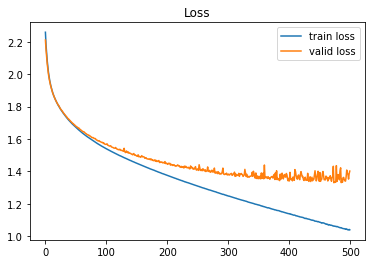

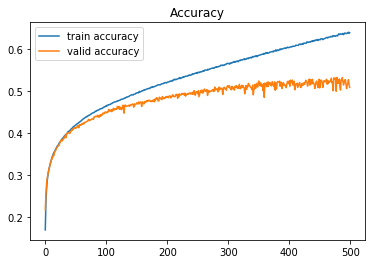

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()